<a href="https://colab.research.google.com/github/Sidra-memon/Text-Preprocessing-and-Classification-with-Naive-Bayes/blob/main/Text_Preprocessing_and_Classification_with_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Movie Reviews Classification
**Goal:** Classify movie reviews as "positive" or "negative."\
**Dataset:** IMDb movie reviews (or any public movie review dataset). https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
df = pd.read_csv('/content/IMDB Dataset.csv')
df.head()

review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


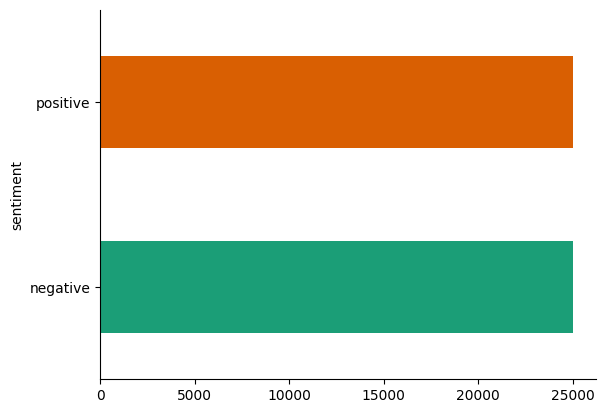

In [ ]:
df.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

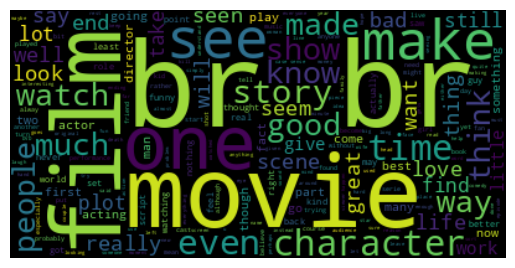

In [ ]:
text = ' '.join(df['review'])
wordcloud = WordCloud(max_words=200).generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
len(df)

50000

In [ ]:
#lowercase the words in review column
preprocess = []

for i in range(50000):
  print(df.review[i])
  preprocess.append(df.review[i].lower())

df['Prep_Message'] = preprocess
df.head()

Streaming output truncated to the last 5000 lines.
On the Opening night of the San Francisco Silent Film festival I was quite excited to see films that are historical and well not common. The guest speaker who opened this film created a sense of hype towards the obscurity, and how this film is underrated. The sci-fi part of the film was very interesting and fantastic for its time, but i'm not sure if it was due to the fact it was shown directly after the Brilliant 1928 "The Wind" or if it seemed that Russian filmmakers take after what Russian novels are famous for (hundreds of characters, tangled plots) but I know for certain that the dramatic parts, as in the parts on Earth, made absolutely no sense, were boring and I became lost within about twenty minutes. Maybe it was the acting but I found myself convinced as to why this film is "unknown and underrated": It's boring, there is no plot or basic story and the acting is horrible. This certainly is no "Battleship Potemkin", however I w

In [ ]:
# prompt: tell me regex to remove URL from df

def remove_urls(text):
    return re.sub(r'http\S+', ' ', text)

df['Prep_Message'] = df['Prep_Message'].apply(remove_urls)
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        Prep_Message  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production. <br /><br />the...  
2  i thought this was a wonderful way to spend ti...  
3  basically there's a family where a little boy ...  
4  petter mattei's "love in the time of money" is...

In [ ]:
def remove_non_alphanumeric(text):
  return re.sub(r'[^a-zA-Z0-9]', ' ', text)

df['Prep_Message'] = df['Prep_Message'].apply(remove_non_alphanumeric)
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        Prep_Message  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production   br    br   the...  
2  i thought this was a wonderful way to spend ti...  
3  basically there s a family where a little boy ...  
4  petter mattei s  love in the time of money  is...

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
df['Prep_Message'] = df['Prep_Message'].apply(word_tokenize)
df.head(10)

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   
5  Probably my all-time favorite movie, a story o...  positive   
6  I sure would like to see a resurrection of a u...  positive   
7  This show was an amazing, fresh & innovative i...  negative   
8  Encouraged by the positive comments about this...  negative   
9  If you like original gut wrenching laughter yo...  positive   

                                        Prep_Message  
0  [one, of, the, other, reviewers, has, mentione...  
1  [a, wonderful, little, production, br, br, the...  
2  [i, thought, this, was, a, wonderful, way, to,...  
3  [basically, there, s, a, family, where, a, lit...  
4  [petter, mattei, s, love, in, the, time, of, m...  
5  [probably, my, all, time, favorite, movie, a, ...  
6  [i, sure, would, like, to, see, a, resurrectio...  
7  [this, show, was, an, amazing, fresh, innovati...  
8  [encouraged, by, the, positive, comments, abou...  
9  [if, you, like, original, gut, wrenching, laug...

In [ ]:
stop_words = set(stopwords.words('english'))

df['Prep_Message'] = df['Prep_Message'].apply(lambda token_list: [word for word in token_list if word not in stop_words])
df.head(10)

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   
5  Probably my all-time favorite movie, a story o...  positive   
6  I sure would like to see a resurrection of a u...  positive   
7  This show was an amazing, fresh & innovative i...  negative   
8  Encouraged by the positive comments about this...  negative   
9  If you like original gut wrenching laughter yo...  positive   

                                        Prep_Message  
0  [one, reviewers, mentioned, watching, 1, oz, e...  
1  [wonderful, little, production, br, br, filmin...  
2  [thought, wonderful, way, spend, time, hot, su...  
3  [basically, family, little, boy, jake, thinks,...  
4  [petter, mattei, love, time, money, visually, ...  
5  [probably, time, favorite, movie, story, selfl...  
6  [sure, would, like, see, resurrection, dated, ...  
7  [show, amazing, fresh, innovative, idea, 70, f...  
8  [encouraged, positive, comments, film, looking...  
9  [like, original, gut, wrenching, laughter, lik...

In [ ]:
lemmatizer = WordNetLemmatizer()
df['Lemmatized_Message'] = df['Prep_Message'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x]))
df.head()

review sentiment  \
0  One of the other reviewers has mentioned that ...  positive   
1  A wonderful little production. <br /><br />The...  positive   
2  I thought this was a wonderful way to spend ti...  positive   
3  Basically there's a family where a little boy ...  negative   
4  Petter Mattei's "Love in the Time of Money" is...  positive   

                                        Prep_Message  \
0  [one, reviewers, mentioned, watching, 1, oz, e...   
1  [wonderful, little, production, br, br, filmin...   
2  [thought, wonderful, way, spend, time, hot, su...   
3  [basically, family, little, boy, jake, thinks,...   
4  [petter, mattei, love, time, money, visually, ...   

                                  Lemmatized_Message  
0  one reviewer mentioned watching 1 oz episode h...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake think zombie ...  
4  petter mattei love time money visually stunnin...

In [ ]:
#this is just t check the different out from  real to lemmetized message
for i in range(5):
  print(df.review[i])
  print(df.Prep_Message[i])
  print(df.Lemmatized_Message[i])

# Data Preparation for Machine learning Algorithms

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.pipeline import Pipeline
# for evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix

X = df["Lemmatized_Message"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
tfidf = TfidfVectorizer()
naive_bayes = MultinomialNB()
nb = Pipeline([("tfidf", tfidf), ("naive_bayes", naive_bayes)])
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
accuracynb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracynb)


Naive Bayes Accuracy: 0.8694


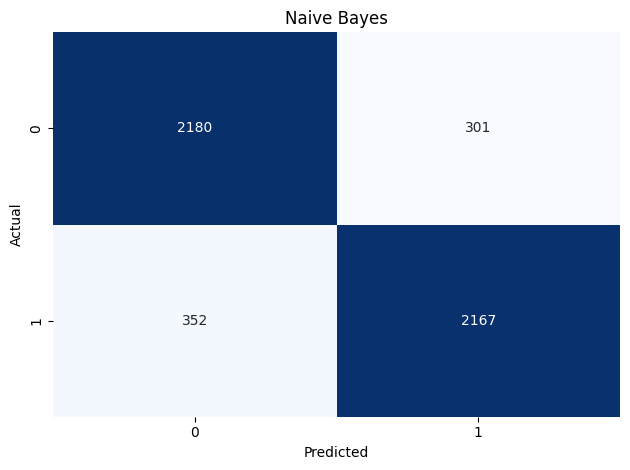

In [ ]:
# creating confusion matrices using def function
cm_nb = confusion_matrix(y_test, y_pred_nb)

# function to plot confusion matrix
def plot_confusion_matrix(cm, ax, title):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

# Create a matplotlib figure and axes
fig, ax = plt.subplots()

# Call the function with all three arguments, including the axes object
plot_confusion_matrix(cm_nb, ax, 'Naive Bayes')

plt.tight_layout()
plt.show()


*   True Positives (TP): 2167 (Correctly predicted as Class 1)
*   True Negatives (TN): 2180 (Correctly predicted as Class 0)
*   False Positives (FP): 301 (Incorrectly predicted as Class 1)
*   False Negatives (FN): 352 (Incorrectly predicted as Class 0)






# Conclusion

1.  There are 352 false negatives, meaning some actual positives were misclassified as negatives. This could be critical depending on the application (e.g., in medical diagnoses, missing positive cases can be costly).

2.  The 301 false positives indicate some negative samples were misclassified as positives, which might lead to unnecessary actions or interventions.

